**Installing libraries + import**

In [ ]:
!pip install textblob

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install gensim

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import nltk
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

visualization tools for NLP

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import re
import warnings
warnings.filterwarnings("ignore")

#Loading datas from datasets & exploring it

In [ ]:
import csv

file_path = '/content/amazon_reviews.csv'
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        if len(row) != 8:  # Assuming there should be 8 columns
            print(f"Line {i + 1} has {len(row)} columns: {row}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Line 3108 has 10 columns: ['f40ec534-9c26-40b2-a20d-b4fmouse pad', ' wireless mouse', " etc.) it's annoying 😒 I have to waist soooo much time clicking the next page", ' the next page', ' the next page ... 😑 just till I find the actual item at the lowest price!! waist over 10 minutes... 💀 FIX IT!!!! YOU\'RE A MULTI-BILLION DOLLAR COMPANY!!! FFFFFFFF*CK!!! 🔥"', '2', '6', '22.7.0.100', '2021-05-04 17:36:17', '22.7.0.100']
Line 5602 has 10 columns: ['52f1b032-c07f-4719-a0a6-0bc71190633d', 'Michael Wagner', "This company is turning into garbage. Products don't arrive quickly (even though you pay for it). Quality has e5e0d1d48", 'Michelle Ward', 'good value items more often then not cheaper then anywhere else and prompt more often then not next day delivery and you are given a delivery window of time which is never wrong all in all excellent out of five I would give 6 if I could', '5', '0', '28.5.2.100', '2024-03-21 15:13:04', '28.5.2.100']


removing problematic rows

In [ ]:
import shutil

original_file_path = '/content/amazon_reviews.csv'
copy_file_path = '/content/amazon_reviews_copy.csv'

# Create a copy of the original file
shutil.copyfile(original_file_path, copy_file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content/amazon_reviews_copy.csv'

In [ ]:
import shutil
import csv
import pandas as pd
from io import StringIO

original_file_path = '/content/amazon_reviews.csv'
copy_file_path = '/content/amazon_reviews_copy.csv'
shutil.copyfile(original_file_path, copy_file_path)

def filter_lines(file_path, lines_to_skip):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    filtered_lines = [line for i, line in enumerate(lines) if i + 1 not in lines_to_skip]
    return StringIO(''.join(filtered_lines))

lines_to_skip = [3108, 5602]

filtered_data = filter_lines(copy_file_path, lines_to_skip)
amazon_df = pd.read_csv(filtered_data)

print("Shape: {}\nColumns: {}".format(amazon_df.shape, amazon_df.columns))

cleaned_file_path = '/content/amazon_reviews_cleaned.csv'
amazon_df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape: (51430, 8)
Columns: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')
Cleaned data saved to /content/amazon_reviews_cleaned.csv


In [ ]:
amazon_dfc = pd.read_csv('/content/amazon_reviews_cleaned.csv')
print("Shape: {}\nColumns: {}".format(amazon_dfc.shape, amazon_dfc.shape))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape: (51430, 8)
Columns: (51430, 8)


In [ ]:
amazon_dfc.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

## Preprocessing Text Data

In [ ]:
def simple_preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Removing all punctuation in text
    text = re.sub(r'\d+', '', text)  # Removing all digits in text
    text = text.strip()  # Removing whitespace
    return text


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amazon_dfc['content_c'] = amazon_dfc['content'].apply(preprocess_text)
amazon_dfc.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'content'

In [ ]:
amazon_dfc.isnull()
total_null_values = amazon_dfc.isnull().sum().sum()
print("Total null values: {}".format(total_null_values))

Total null values: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amazon_dfc.fillna('', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amazon_dfc['at'] = pd.to_datetime(amazon_dfc['at'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amazon_dfc = amazon_dfc[['content_c', 'score', 'reviewId', 'at']]
amazon_dfc.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content_c,score,reviewId,at
0,these cretins are the enshittification cycle w...,1,15804c52-84bb-4007-990b-49252480c565,2024-05-23 22:47:16
1,great,5,a07ee4ff-69cb-48e2-814f-1a21d3d50505,2024-05-23 22:10:44
2,they put ads onto prime video and im not payin...,1,bf28408e-e8cd-4e81-83e5-1da880e12d7a,2024-05-23 22:04:28
3,bug on samsung the app can only use mobil data...,3,852de0e2-459e-4416-ae4a-3f2250f41833,2024-05-23 21:56:19
4,would be better if you could buy gift cards wi...,1,1f388927-eba1-43bf-9fa4-5dd006e6d28c,2024-05-23 21:45:19


In [ ]:
#Ranges of datetime
print("Earlies review date was: {},\n Latest reveiw was: {}".format(amazon_dfc['at'].min(), amazon_dfc['at'].max()))

Earlies review date was: 2018-09-12 10:08:56,
 Latest reveiw was: 2024-05-23 22:47:16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


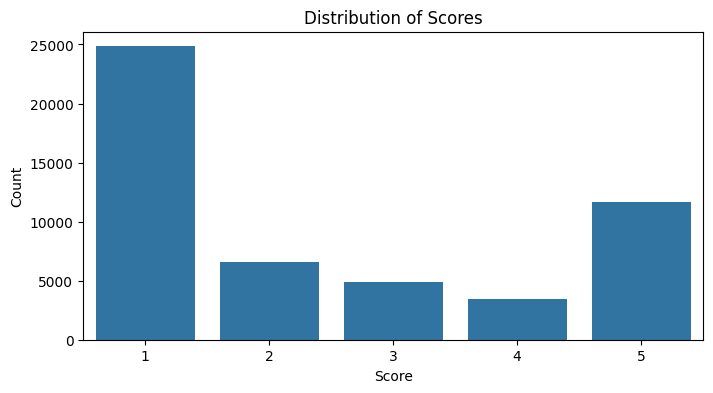

In [ ]:
score_dist = amazon_dfc.score.value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=score_dist.index, y=score_dist.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

###Polarity

In [ ]:
def get_sentiment(text):
  return TextBlob(text).sentiment.polarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amazon_dfc['sentiment'] = amazon_dfc['content_c'].apply(get_sentiment)
amazon_dfc['sentiment_label'] = amazon_dfc['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amazon_dfc[['content_c', 'score', 'sentiment_label']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content_c,score,sentiment_label
0,these cretins are the enshittification cycle w...,1,positive
1,great,5,positive
2,they put ads onto prime video and im not payin...,1,negative
3,bug on samsung the app can only use mobil data...,3,neutral
4,would be better if you could buy gift cards wi...,1,positive
...,...,...,...
51425,amazon smile donates make sure you get all set...,5,positive
51426,after having problems with the app and having ...,5,positive
51427,used to be great got greedy they ruined the mu...,1,positive
51428,new search bar location sucks at least give me...,2,neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


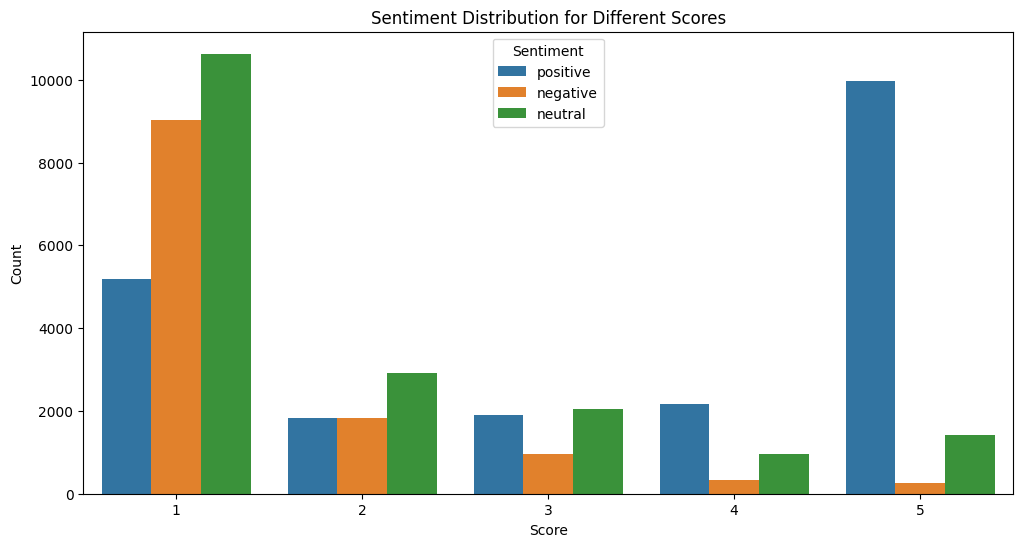

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=amazon_dfc, x='score', hue='sentiment_label')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Different Scores')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# Setting up stopwords for model performance
stopwords = set(STOPWORDS)
stopwords.update(['amazon', 'movie', 'show', 'time', 'app', 'series', 'phone'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def preprocess_text_data(text):
    tokens = [token for token in text.lower().split() if token.isalnum()] # tokenize text and remove stopwords
    return tokens

texts = [preprocess_text(text) for text in amazon_dfc[amazon_dfc['sentiment_label']=='negative']['content_c']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['they put ads onto prime video and im not paying for shipping that not only ships broken items multiple times but also straight up sends the wrong items',
 'days ago i got charged by amazon for  i talked to  indian representatives the first guy bibinraj denied the transaction was on my account but then he said i subscribed to the prime membership he said amazon did not have anything to do with it and it was google i already explained the situation to him but all he did was denying all the proofs i gave and repeating things over and over again second guy prashanth was the same those two are the worst',
 'hr plus on hold and no one ever bothered to come back i pay from amazon prime so items get delivered within days never happens with the big items always a delay false advertisement amazon',
 'rufus needs to go or have a toggle to be disabled the rufus bar is taking up screen space that is blocking elements in the app',
 'no complaints here does what it should and well enough for me to 

In [ ]:
# Assuming 'texts' is a list of documents you want to preprocess
tokenized_texts = [simple_preprocess(text) for text in texts]
tokenized_texts = [[word for word in doc.split() if word not in stopwords] for doc in tokenized_texts]  # Remove stopwords

# Create dict and corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=5, workers=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = lda_model.print_topics(-1)
for idx, topic in topics:
    print(f"Topic {idx}: {topic}")

Topic 0: 0.012*"use" + 0.011*"notifications" + 0.010*"account" + 0.008*"dont" + 0.008*"cant" + 0.007*"bad" + 0.007*"change" + 0.006*"im" + 0.006*"product" + 0.006*"slow"
Topic 1: 0.018*"order" + 0.017*"delivery" + 0.014*"service" + 0.012*"prime" + 0.012*"dont" + 0.010*"day" + 0.010*"customer" + 0.010*"now" + 0.010*"will" + 0.010*"days"
Topic 2: 0.017*"update" + 0.016*"cant" + 0.013*"something" + 0.012*"wrong" + 0.010*"now" + 0.010*"orders" + 0.009*"slow" + 0.009*"even" + 0.009*"page" + 0.009*"fix"
Topic 3: 0.014*"search" + 0.012*"now" + 0.010*"dont" + 0.009*"update" + 0.009*"use" + 0.008*"service" + 0.008*"cant" + 0.007*"way" + 0.007*"back" + 0.007*"hate"
Topic 4: 0.018*"account" + 0.014*"customer" + 0.013*"service" + 0.010*"card" + 0.010*"even" + 0.008*"experience" + 0.008*"cant" + 0.008*"worst" + 0.007*"prime" + 0.007*"bad"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
